# A graphical example

### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Setting random seeds to get reproducible results
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)

### Plotting functions

In [7]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels, point_size=25):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = point_size,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = point_size,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend(['label 1','label 0'])

def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

f = lambda x: int(x[1]>x[0])
def g(Z):
    return np.array([f(i) for i in Z])

def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = g(Z).reshape(xx.shape)
    plt.contour(xx, yy, Z, colors = 'k',linewidths = 1)
    plot_points(X, y)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    plt.show()

### Loading the dataset
For the next two cells, please run only one of them.
- Run the first cell if you cloned the Github Repo
- Run the second cell if you opened this as a Google Colab


In [ ]:
# IMPORTANT: ONLY RUN THIS CELL IF YOU HAVE CLONED THE REPO
df = pd.read_csv('one_circle.csv', index_col=0)

In [8]:
# IMPORTANT: ONLY RUN THIS CELL IF YOU ARE WORKING ON A COLAB

url = "https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_10_Neural_Networks/one_circle.csv"
df = pd.read_csv(url)

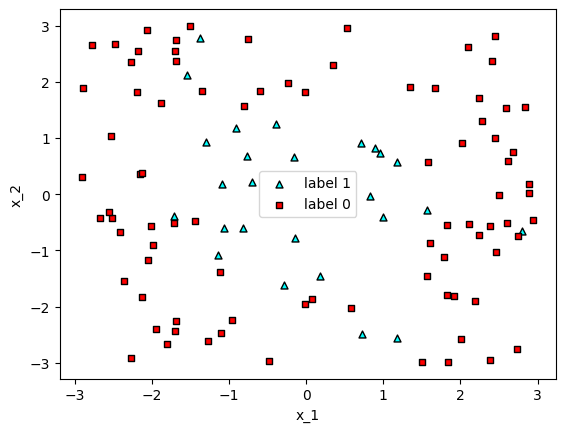

In [9]:
x = np.array(df[['x_1', 'x_2']])
y = np.array(df['y']).astype(int)
plot_points(x,y)

In [10]:
df

,Unnamed: 0,x_1,x_2,y
0,0,-0.759416,2.753240,0
1,1,-1.885278,1.629527,0
2,2,2.463302,-1.023869,0
3,3,-1.986004,-0.898810,0
4,4,2.010834,-2.580117,0
...,...,...,...,...
105,105,-1.376637,2.778703,1
106,106,-0.703722,0.215382,1
107,107,0.729767,-2.479655,1
108,108,-1.715920,-0.393404,1


In [11]:
x[:10]

array([[-0.759416  ,  2.7532401 ],
       [-1.8852779 ,  1.62952654],
       [ 2.46330243, -1.02386888],
       [-1.98600415, -0.89880979],
       [ 2.01083403, -2.58011745],
       [ 2.41018752,  2.37050087],
       [ 1.59914005, -0.86273162],
       [-1.10985644, -2.46969746],
       [ 2.4473419 ,  2.81117994],
       [-1.69773161,  2.53984757]])

In [12]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Preprocessing the data

In [13]:
# Categorizing the output

from tensorflow.keras.utils import to_categorical
categorized_y = np.array(to_categorical(y, 2))
categorized_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

### Building and compiling the neural network

In [14]:
# Imports
#import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.optimizers import SGD

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(2,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,770 (34.26 KB)

 Trainable params: 8,770 (34.26 KB)

 Non-trainable params: 0 (0.00 B)

### Training the neural network

In [15]:
# Training the model
model.fit(x, categorized_y, epochs=100, batch_size=10)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5251 - loss: 0.6495
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7584 - loss: 0.4620 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7584 - loss: 0.4315 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7584 - loss: 0.4457 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7584 - loss: 0.4270 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7584 - loss: 0.4150 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7584 - loss: 0.4376 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7584 - loss: 0.4372 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7584 - loss: 0.4216 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7584 - loss: 0.4120 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7584 - loss: 0.4200 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

### Plotting the results

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


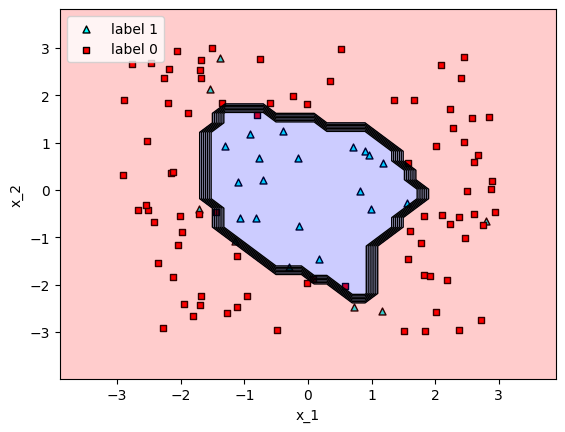

In [17]:
plot_model(x, y, model)